<a href="https://colab.research.google.com/github/iiivvv/alg/blob/main/%D0%9A%D0%A01_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style="text-align: center;"><b>Библиотека <a href="http://pandas.pydata.org/">pandas</a>: Контрольная работа №1</b></h2>

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import numpy as np

### Размещение DF (датафрейма) в формате csv: https://drive.google.com/open?id=1il9RDoxwrgUjoOqd9yvdV760_M1AvziI

#### считать файл по ссылке

In [ ]:
df = pd.read_csv('https://drive.google.com/uc?id=1il9RDoxwrgUjoOqd9yvdV760_M1AvziI')

In [ ]:
df


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


### Посмотрим, что же такое переменная `df`:

### выяснить тип объекта

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


---

#### Вопрос

О чём данные?


Данные покупателей и их покупок


---

#### Основное задание:

*Примечание:* не бойтесь гуглить и заглядывать в "Полезные ссылки" для того, чтобы выполнить какие-то задания. Возможно, в курсе не было какого-то нужного метода, но он находится в поисковике за 2 минуты.

**0).** Сколько всего возрастных категорий?  

In [ ]:
 
a = pd.unique(df['Age'].values.ravel())
a

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

Возрастных категорий 7

**1).** Сколько строк с мужчинами из категории города A? (речь не об уникальных ID мужчин, а о количестве строк)  

In [ ]:

len(df[(df['City_Category']=='A') & (df['Gender'] == 'M')])

109831

**2).** Сколько женщин от 46 до 50, потративших (столбец Purchase) больше 20000 (условных единиц, в данном случае)?   (речь не об уникальных ID, а о количестве строк)  

In [ ]:

df[(df['Age']=='46-50') & (df['Gender'] == 'F') & (df['Purchase']>20000)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1106,1000187,P00247642,F,46-50,1,B,1,0,7,NaN,NaN,20771
5620,1000905,P00052842,F,46-50,12,C,1,0,10,15.0,NaN,23449
8982,1001376,P00255842,F,46-50,1,C,1,1,16,NaN,NaN,20425
10833,1001654,P00035442,F,46-50,0,A,0,1,7,NaN,NaN,20810
13697,1002038,P00109242,F,46-50,1,B,3,1,6,8.0,10.0,20214
...,...,...,...,...,...,...,...,...,...,...,...,...
534571,1004305,P00259942,F,46-50,17,B,1,1,16,NaN,NaN,20575
534581,1004305,P00093642,F,46-50,17,B,1,1,6,NaN,NaN,20688
535312,1004408,P00101342,F,46-50,2,B,1,1,6,8.0,NaN,20257
536807,1004614,P00116142,F,46-50,1,B,1,0,10,13.0,16.0,23904


270

**3).** Сколько NaN'ов в столбце Product_Category_3?  

In [ ]:
df['Product_Category_3'].isna().sum()

373299

**4).** Какую долю (вещественное число от 0 до 1, округлить до 4-го знака) от всех покупателей составляют ВМЕСТЕ мужчины от 26 до 35 лет и женщины старше 36 лет (то есть нужно учесть несколько возрастных категорий)? (речь не об уникальных ID, а о количестве таких строк)  

In [ ]:
a = len(df[(df['Age']=='26-35') & (df['Gender'] == 'M')]) + len(df[((df['Age']=='36-45') | (df['Age']=='46-50') | (df['Age']=='51-55') | (df['Age']=='55+')) & (df['Gender'] == 'F')])
print(round(a/df.shape[0],4))

0.4077


**5).** Построить сравнительную диаграмму зависимости суммы потраченных средств по возрастным категориям для мужчин и женщин

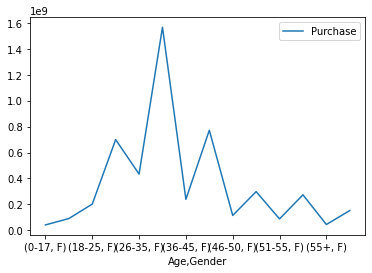

In [ ]:
df[['Gender','Age','Purchase']].groupby(['Age','Gender']).sum().plot.line()

**6).** Найдите самую оптимальную сумму для каждого пола

In [ ]:
df[['Gender','Purchase']].groupby(['Gender']).median()

,Purchase
Gender,
F,7929
M,8112


---

Больше про pandas можно найти по этом полезным ссылкам:

* Официальные туториалы: http://pandas.pydata.org/pandas-docs/stable/tutorials.html

* Статья на Хабре от [OpenDataScience сообщества](http://ods.ai/)**:** https://habr.com/company/ods/blog/322626/

* Подробный гайд: https://media.readthedocs.org/pdf/pandasguide/latest/pandasguide.pdf

* видео вебинара с GB "Первичный анализ данных с Pandas (Python)" https://gb.ru/events/3717

Главное в работе с новыми библиотеками -- не бояться тыкать в разные функции, смотреть типы возвращаемых объектов и активно пользоваться Яндексом, а ещё лучше понимать всё из docstring'а (`Shift+Tab` при нахождении курсора внутри скобок функции).